data.shape(181, 4)


,timestamp,sim1,sim2,sim3
0,2023-05-13 11:44:42.840000-07:00,0.0389,1.0375,2.0370
1,2023-05-13 11:44:43.869000-07:00,0.7953,1.7660,2.7532
2,2023-05-13 11:44:44.989000-07:00,1.2240,2.2297,3.2119
3,2023-05-13 11:44:46.074000-07:00,1.4414,2.5315,3.5226
4,2023-05-13 11:44:47.177000-07:00,1.6061,2.7468,3.7610


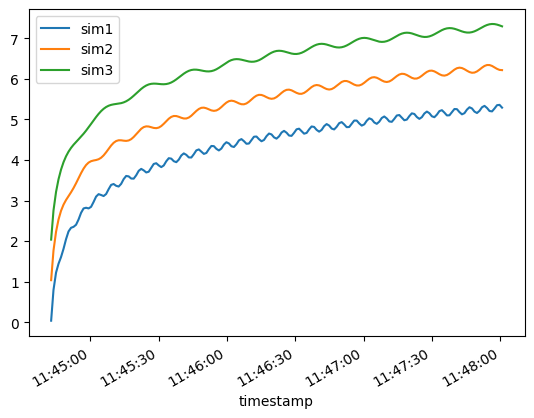

In [16]:
import linecache
import pandas as pd  # https://pandas.pydata.org/pandas-docs/stable/reference/index.html

data_file = "..\\data_log.csv"

sensor_count = int(linecache.getline(data_file, 1).split(',')[-1].strip())
start_timestamp = linecache.getline(data_file, 2).split(',')[-1].strip()

data = pd.read_csv(
    data_file,
    header=3 + sensor_count,
    parse_dates=["timestamp"],
)
print(f"data.shape{data.shape}")
display(data.head())
axes = data.plot.line(x="timestamp")

In [17]:
sensor_traits = pd.read_csv(
    data_file,
    header=2,
    nrows=sensor_count,
)
print(f"sensor_traits.shape{sensor_traits.shape}")
display(sensor_traits)

sensor_traits.shape(3, 7)


,name,Vex,CF,X0,Units,Sensor,IO Device
0,sim1,1.0,1.0,0.0,V,Voltage,9219
1,sim2,1.0,1.0,0.0,mm,Voltage,9219
2,sim3,1.0,1.0,0.0,lb,Load,9219
